<a href="https://colab.research.google.com/github/AbdAllAh950/Algorithms/blob/main/T3_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0(Abdallah_Essa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, least_squares

In [19]:
# Generate random numbers alpha and beta
np.random.seed(42)  # Fixing seed for reproducibility
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

In [20]:
# Generate noisy data
n = 100
x_data = np.linspace(1, n, n)
noise = np.random.normal(0, 1, n)
y_data = alpha * x_data + beta + noise


In [21]:
# Define the linear and rational approximants
def linear_approximant(x, a, b):
    return a * x + b

In [22]:
def rational_approximant(x, a, b):
    return a / (x + b)

In [23]:
# Define the objective function to minimize (least squares)
def objective_function_linear(params, x, y):
    a, b = params
    return np.sum((linear_approximant(x, a, b) - y) ** 2)

In [24]:
def objective_function_rational(params, x, y):
    a, b = params
    return np.sum((rational_approximant(x, a, b) - y) ** 2)

In [25]:
# Define the Jacobian for the linear and rational approximants
def jacobian_linear(params, x, y):
    a, b = params
    grad_a = 2 * np.sum(x * (linear_approximant(x, a, b) - y))
    grad_b = 2 * np.sum(linear_approximant(x, a, b) - y)
    return np.array([grad_a, grad_b])

In [26]:
def jacobian_rational(params, x, y):
    a, b = params
    grad_a = 2 * np.sum((rational_approximant(x, a, b) - y) / (x + b))
    grad_b = -2 * np.sum(a * (rational_approximant(x, a, b) - y) / ((x + b) ** 2))
    return np.array([grad_a, grad_b])

In [27]:
# Initial guesses for a and b
initial_guess = [1, 1]

# Set optimization options
tolerance = 1e-3


In [28]:
# Gradient Descent (using scipy minimize)
linear_result_gd = minimize(objective_function_linear, initial_guess, args=(x_data, y_data), method='CG', tol=tolerance)
rational_result_gd = minimize(objective_function_rational, initial_guess, args=(x_data, y_data), method='CG', tol=tolerance)


In [29]:
# Newton's method (using scipy minimize) with Jacobians
linear_result_newton = minimize(objective_function_linear, initial_guess, args=(x_data, y_data), method='Newton-CG', jac=jacobian_linear, tol=tolerance)
rational_result_newton = minimize(objective_function_rational, initial_guess, args=(x_data, y_data), method='Newton-CG', jac=jacobian_rational, tol=tolerance)


In [30]:
# Levenberg-Marquardt (using scipy least_squares)
linear_result_lm = least_squares(lambda params: linear_approximant(x_data, *params) - y_data, initial_guess, method='lm', ftol=tolerance)
rational_result_lm = least_squares(lambda params: rational_approximant(x_data, *params) - y_data, initial_guess, method='lm', ftol=tolerance)


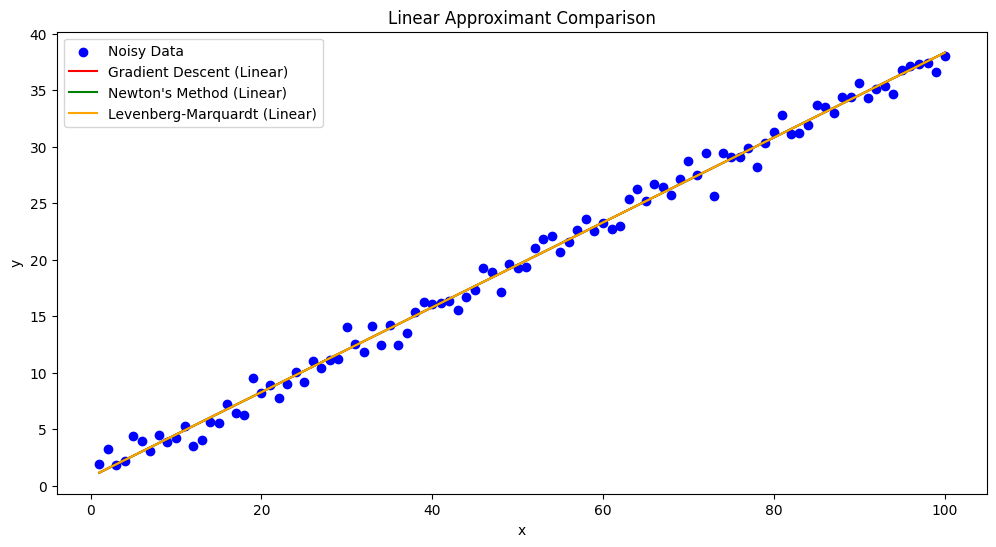

In [31]:
# Plotting results for linear approximation
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Noisy Data', color='blue')
plt.plot(x_data, linear_approximant(x_data, *linear_result_gd.x), label='Gradient Descent (Linear)', color='red')
plt.plot(x_data, linear_approximant(x_data, *linear_result_newton.x), label="Newton's Method (Linear)", color='green')
plt.plot(x_data, linear_approximant(x_data, *linear_result_lm.x), label="Levenberg-Marquardt (Linear)", color='orange')
plt.title('Linear Approximant Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

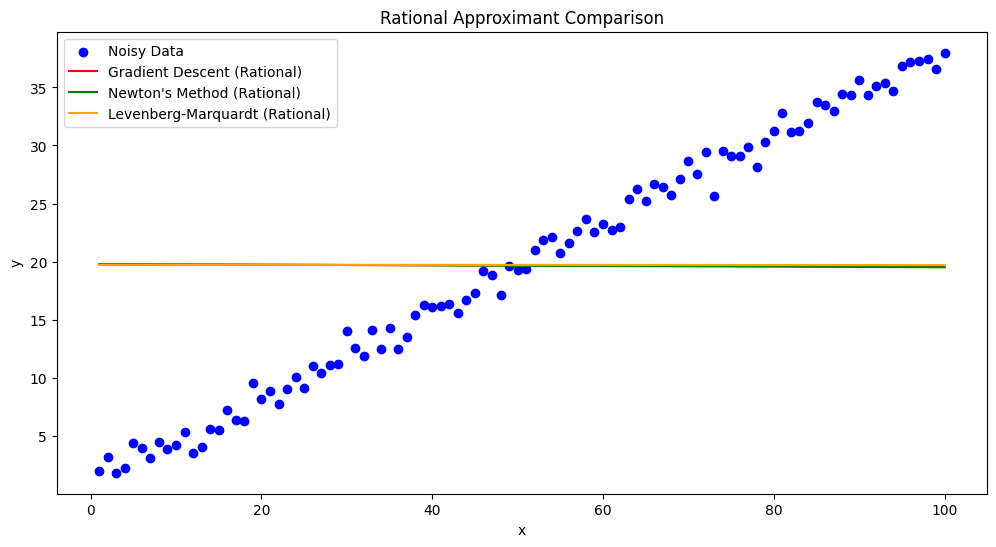

In [32]:
# Plotting results for rational approximation
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label='Noisy Data', color='blue')
plt.plot(x_data, rational_approximant(x_data, *rational_result_gd.x), label='Gradient Descent (Rational)', color='red')
plt.plot(x_data, rational_approximant(x_data, *rational_result_newton.x), label="Newton's Method (Rational)", color='green')
plt.plot(x_data, rational_approximant(x_data, *rational_result_lm.x), label="Levenberg-Marquardt (Rational)", color='orange')
plt.title('Rational Approximant Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [33]:

# Print results for linear approximation
print("Linear Approximation Results:")
print(f"Gradient Descent: a = {linear_result_gd.x[0]}, b = {linear_result_gd.x[1]}")
print(f"Newton's Method: a = {linear_result_newton.x[0]}, b = {linear_result_newton.x[1]}")
print(f"Levenberg-Marquardt: a = {linear_result_lm.x[0]}, b = {linear_result_lm.x[1]}")


Linear Approximation Results:
Gradient Descent: a = 0.3753320940791128, b = 0.7849283448968027
Newton's Method: a = 0.37533209779162197, b = 0.7849285888032553
Levenberg-Marquardt: a = 0.37533212177549635, b = 0.7849269819092289


In [34]:
# Print results for rational approximation
print("\nRational Approximation Results:")
print(f"Gradient Descent: a = {rational_result_gd.x[0]}, b = {rational_result_gd.x[1]}")
print(f"Newton's Method: a = {rational_result_newton.x[0]}, b = {rational_result_newton.x[1]}")
print(f"Levenberg-Marquardt: a = {rational_result_lm.x[0]}, b = {rational_result_lm.x[1]}")


Rational Approximation Results:
Gradient Descent: a = 210606.11115664238, b = 10650.762741991632
Newton's Method: a = 139979.1666852823, b = 7070.8104031551375
Levenberg-Marquardt: a = 1231631.3775592668, b = 62395.44888800905
